In [ ]:
!pip install "aaanalysis[pro]"

In [1]:
import aaanalysis as aa
aa.options["verbose"] = False
aa.options["random_state"] = 43

In [6]:
df_seq = aa.load_dataset(name="DOM_GSEC")
labels = df_seq["label"].to_list()
df_feat = aa.load_features(name="DOM_GSEC").head(100)
aa.display_df(df_feat, n_rows=100)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.244000,0.103666,0.103666,0.106692,0.110506,0.000000,0.000000,"31,32,33,34,35",0.970400,1.438918
2,"TMD_C_JMD_C-Seg...3,4)-FINA910104",Conformation,α-helix (C-cap),α-helix termination,"Helix terminati...n et al., 1991)",0.243000,0.085064,0.085064,0.098774,0.096946,0.000000,0.000000,"31,32,33,34,35",0.000000,0.000000
3,"TMD_C_JMD_C-Seg...6,9)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.233000,0.137044,0.137044,0.161683,0.176964,0.000000,0.000001,"32,33",1.554800,2.109848
4,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
5,"TMD_C_JMD_C-Seg...6,9)-RADA880106",ASA/Volume,Volume,Accessible surface area (ASA),"Accessible surf...olfenden, 1988)",0.223000,0.095071,0.095071,0.114758,0.132829,0.000000,0.000002,"32,33",0.000000,0.000000
6,"TMD_C_JMD_C-Seg...2,3)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.222000,0.058671,0.058671,0.064895,0.069547,0.000000,0.000001,"27,28,29,30,31,32,33",0.000000,0.000000
7,"TMD_C_JMD_C-Seg...4,5)-FAUJ880109",Energy,Isoelectric point,Number hydrogen bond donors,"Number of hydro...e et al., 1988)",0.215000,0.146661,0.146661,0.174609,0.188034,0.000000,0.000004,"33,34,35,36",1.032400,1.510722
8,"TMD_C_JMD_C-Seg...3,4)-JANJ780101",ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessi...n et al., 1978)",0.215000,0.124317,0.124317,0.166309,0.153364,0.000000,0.000004,"31,32,33,34,35",1.080400,1.296094
9,"TMD_C_JMD_C-Seg...,10)-WILM950103",Polarity,Hydrophobicity (interface),Hydrophobicity (interface),"Hydrophobicity ...e et al., 1995)",0.212000,0.141305,-0.141305,0.168603,0.217235,0.000000,0.000005,"33,34",1.747200,2.150664
10,"TMD_C_JMD_C-Seg...6,9)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.125350,0.125350,0.160819,0.174121,0.000000,0.000005,"32,33",1.788800,2.700803


In [37]:
df_feat['positions']
df_feat['feat_importance']

0     1.29
1     1.98
2     2.11
3     1.43
4     1.52
      ... 
95    0.24
96    0.45
97    0.44
98    0.43
99    1.34
Name: feat_importance, Length: 100, dtype: float64

99.94


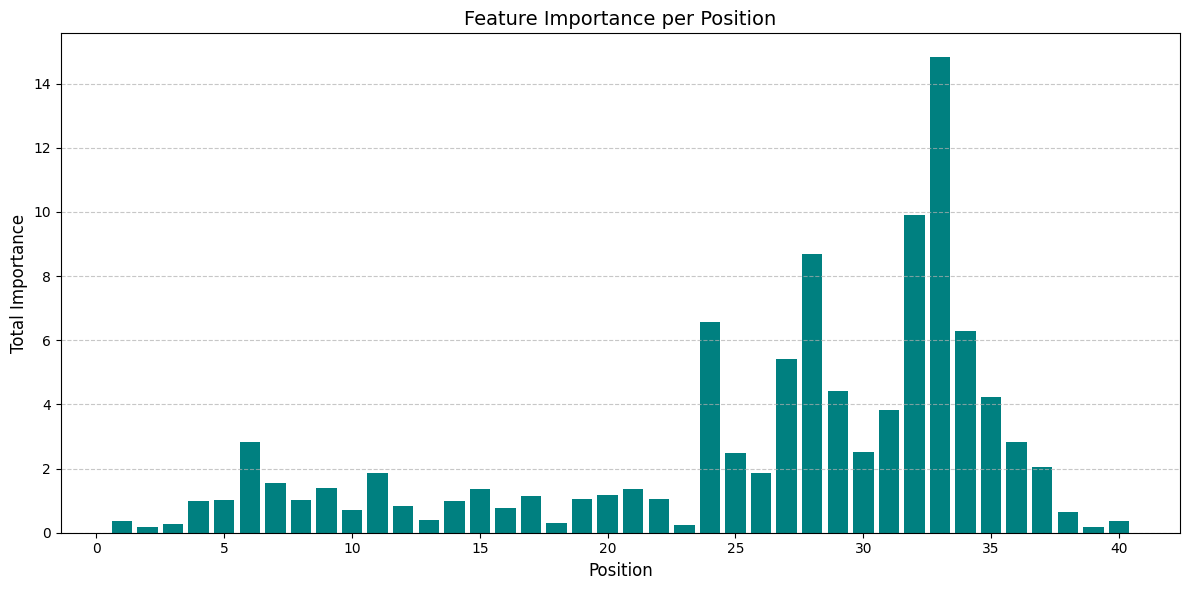

In [44]:
import pandas as pd
from collections import defaultdict

# Dictionary to accumulate importance per position
position_importance = defaultdict(float)

# Iterate through each row
for _, row in df_feat.iterrows():
    positions = str(row['positions']).split(',')  # Ensure it's a string
    importance = row['feat_importance']
    split_importance = importance / len(positions)  # Distribute evenly
    
    for pos in positions:
        pos = int(pos.strip())  # Clean and convert to int
        position_importance[pos] += split_importance

# Convert to a sorted DataFrame
df_pos_importance = pd.DataFrame(
    sorted(position_importance.items()),
    columns=['position', 'total_importance']
)

#print(df_pos_importance.head)
print(df_pos_importance['total_importance'].sum())

import matplotlib.pyplot as plt
# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_pos_importance['position'], df_pos_importance['total_importance'], color='teal')
plt.title("Feature Importance per Position", fontsize=14)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Total Importance", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid only on the y-axis
plt.tight_layout()
plt.show()


In [7]:
features = df_feat["feature"].to_list()
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
df_feat1 = sf.get_df_feat(features=features, labels=labels, df_parts=df_parts)
aa.display_df(df_feat1, n_rows=100)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.335000,0.168254,0.168254,0.106692,0.124924,0.000000,0.000000,"31,32,33,34,35"
2,"TMD_C_JMD_C-Seg...3,4)-FINA910104",Conformation,α-helix (C-cap),α-helix termination,"Helix terminati...n et al., 1991)",0.333000,0.150698,0.150698,0.098774,0.119888,0.000000,0.000000,"31,32,33,34,35"
3,"TMD_C_JMD_C-Seg...6,9)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.330000,0.246867,0.246867,0.161683,0.197489,0.000000,0.000000,"32,33"
4,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.327000,0.162229,0.162229,0.106865,0.135247,0.000000,0.000000,"31,32,33,34,35"
5,"TMD_C_JMD_C-Seg...6,9)-RADA880106",ASA/Volume,Volume,Accessible surface area (ASA),"Accessible surf...olfenden, 1988)",0.322000,0.184252,0.184252,0.114758,0.164757,0.000000,0.000000,"32,33"
6,"TMD_C_JMD_C-Seg...2,3)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.308000,0.092405,0.092405,0.064895,0.077319,0.000000,0.000000,"27,28,29,30,31,32,33"
7,"TMD_C_JMD_C-Seg...4,5)-FAUJ880109",Energy,Isoelectric point,Number hydrogen bond donors,"Number of hydro...e et al., 1988)",0.306000,0.230159,0.230159,0.174609,0.196434,0.000000,0.000000,"33,34,35,36"
8,"TMD_C_JMD_C-Seg...3,4)-JANJ780101",ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessi...n et al., 1978)",0.304000,0.214790,0.214790,0.166309,0.191301,0.000000,0.000000,"31,32,33,34,35"
9,"TMD_C_JMD_C-Seg...,10)-WILM950103",Polarity,Hydrophobicity (interface),Hydrophobicity (interface),"Hydrophobicity ...e et al., 1995)",0.315000,0.246952,-0.246952,0.168603,0.241970,0.000000,0.000000,"33,34"
10,"TMD_C_JMD_C-Seg...6,9)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.343000,0.234114,0.234114,0.160819,0.172073,0.000000,0.000000,"32,33"


In [14]:
# now obtain feature_impact
# Show APP
#aa.display_df(df=df_seq, n_rows=40, char_limit=25)

# Create feature matrix
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)

#aa.display_df(df_seq)

se = aa.ShapModel()
se.fit(X, labels=labels)

shap_values = se.shap_values

# Add feature impact of each sample (Protein0 to Protein125)
df_feat = se.add_feat_impact(df_feat=df_feat, drop=True, shap_feat_importance=True)




aa.display_df(df_feat)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.244000,0.103666,0.103666,0.106692,0.110506,0.000000,0.000000,"31,32,33,34,35",1.290000
2,"TMD_C_JMD_C-Seg...3,4)-FINA910104",Conformation,α-helix (C-cap),α-helix termination,"Helix terminati...n et al., 1991)",0.243000,0.085064,0.085064,0.098774,0.096946,0.000000,0.000000,"31,32,33,34,35",1.980000
3,"TMD_C_JMD_C-Seg...6,9)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.233000,0.137044,0.137044,0.161683,0.176964,0.000000,0.000001,"32,33",2.110000
4,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",1.430000
5,"TMD_C_JMD_C-Seg...6,9)-RADA880106",ASA/Volume,Volume,Accessible surface area (ASA),"Accessible surf...olfenden, 1988)",0.223000,0.095071,0.095071,0.114758,0.132829,0.000000,0.000002,"32,33",1.520000
6,"TMD_C_JMD_C-Seg...2,3)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.222000,0.058671,0.058671,0.064895,0.069547,0.000000,0.000001,"27,28,29,30,31,32,33",1.040000
7,"TMD_C_JMD_C-Seg...4,5)-FAUJ880109",Energy,Isoelectric point,Number hydrogen bond donors,"Number of hydro...e et al., 1988)",0.215000,0.146661,0.146661,0.174609,0.188034,0.000000,0.000004,"33,34,35,36",0.790000
8,"TMD_C_JMD_C-Seg...3,4)-JANJ780101",ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessi...n et al., 1978)",0.215000,0.124317,0.124317,0.166309,0.153364,0.000000,0.000004,"31,32,33,34,35",1.010000
9,"TMD_C_JMD_C-Seg...,10)-WILM950103",Polarity,Hydrophobicity (interface),Hydrophobicity (interface),"Hydrophobicity ...e et al., 1995)",0.212000,0.141305,-0.141305,0.168603,0.217235,0.000000,0.000005,"33,34",1.340000
10,"TMD_C_JMD_C-Seg...6,9)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.125350,0.125350,0.160819,0.174121,0.000000,0.000005,"32,33",1.650000


In [69]:
# Add feature impacts for the first protein (APP)
df_feat1 = se.add_feat_impact(df_feat=df_feat, sample_positions=0, names="APP", drop=True)


df_feat1 = se.add_feat_impact(df_feat=df_feat, sample_positions=1, names="AMD_RAT", drop=True)
aa.display_df(df=df_feat1, n_rows=100)
#y_values = df_feat1['feat_impact_APP']


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_impact_AMD_RAT
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.244000,0.103666,0.103666,0.106692,0.110506,0.000000,0.000000,"31,32,33,34,35",1.590000
2,"TMD_C_JMD_C-Seg...3,4)-FINA910104",Conformation,α-helix (C-cap),α-helix termination,"Helix terminati...n et al., 1991)",0.243000,0.085064,0.085064,0.098774,0.096946,0.000000,0.000000,"31,32,33,34,35",2.470000
3,"TMD_C_JMD_C-Seg...6,9)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.233000,0.137044,0.137044,0.161683,0.176964,0.000000,0.000001,"32,33",2.610000
4,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",2.050000
5,"TMD_C_JMD_C-Seg...6,9)-RADA880106",ASA/Volume,Volume,Accessible surface area (ASA),"Accessible surf...olfenden, 1988)",0.223000,0.095071,0.095071,0.114758,0.132829,0.000000,0.000002,"32,33",2.090000
6,"TMD_C_JMD_C-Seg...2,3)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.222000,0.058671,0.058671,0.064895,0.069547,0.000000,0.000001,"27,28,29,30,31,32,33",1.260000
7,"TMD_C_JMD_C-Seg...4,5)-FAUJ880109",Energy,Isoelectric point,Number hydrogen bond donors,"Number of hydro...e et al., 1988)",0.215000,0.146661,0.146661,0.174609,0.188034,0.000000,0.000004,"33,34,35,36",0.380000
8,"TMD_C_JMD_C-Seg...3,4)-JANJ780101",ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessi...n et al., 1978)",0.215000,0.124317,0.124317,0.166309,0.153364,0.000000,0.000004,"31,32,33,34,35",0.990000
9,"TMD_C_JMD_C-Seg...,10)-WILM950103",Polarity,Hydrophobicity (interface),Hydrophobicity (interface),"Hydrophobicity ...e et al., 1995)",0.212000,0.141305,-0.141305,0.168603,0.217235,0.000000,0.000005,"33,34",0.210000
10,"TMD_C_JMD_C-Seg...6,9)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.125350,0.125350,0.160819,0.174121,0.000000,0.000005,"32,33",0.790000


In [79]:
df_feat_3 = se.add_feat_impact(df_feat=df_feat, sample_positions=1, names="AMD_RAT", drop=True)
df_feat_impacts = df_feat_3['feat_impact_AMD_RAT']

df_feat1 = se.add_feat_impact(df_feat=df_feat, sample_positions=0, names="APP", drop=True)
df_feat_impacts['feat_impact_APP'] = df_feat1['feat_impact_APP']



df_feat_impacts_all = pd.DataFrame({
    'feat_impact_AMD_RAT': df_feat_3['feat_impact_AMD_RAT'],
    'feat_impact_APP': df_feat1['feat_impact_APP']
})
df_feat_impacts_all.head(10)

/var/folders/kw/jxgfh6fx7_v_5_3hk6sqf3nw0000gn/T/ipykernel_51260/3103232608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat_impacts['feat_impact_APP'] = df_feat1['feat_impact_APP']


,feat_impact_AMD_RAT,feat_impact_APP
0,1.59,1.41
1,2.47,2.37
2,2.61,2.10
3,2.05,1.58
4,2.09,1.53
5,1.26,1.15
6,0.38,0.57
7,0.99,1.53
8,0.21,1.34
9,0.79,1.06


99.94


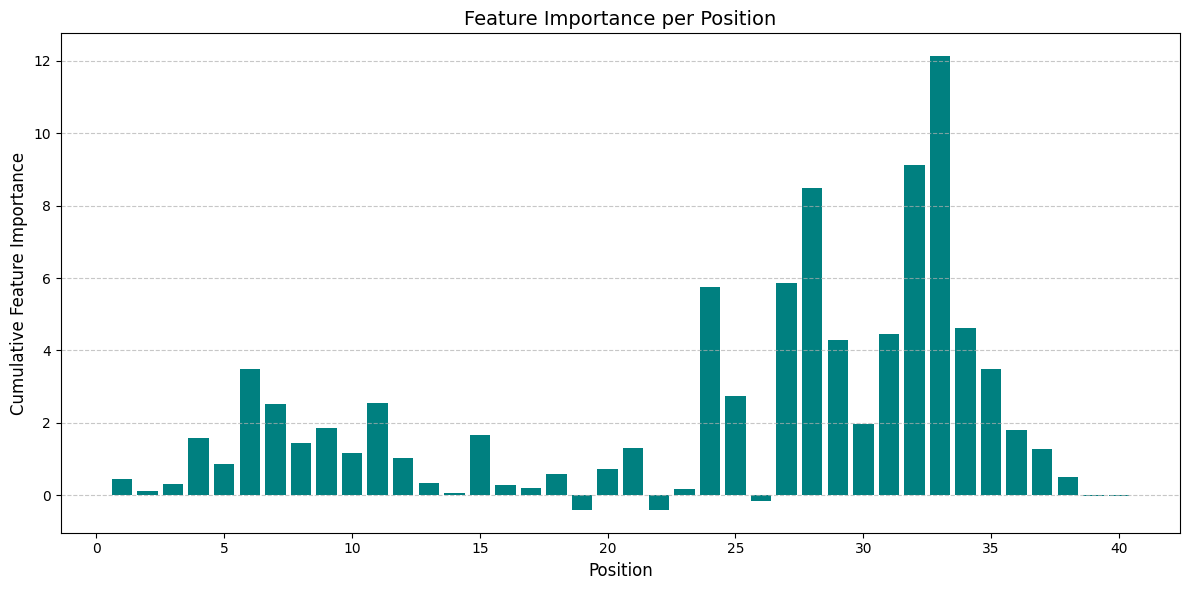

In [72]:

# Dictionary to accumulate importance per position
position_importance1 = defaultdict(float)

# Iterate through each row
for _, row in df_feat1.iterrows():
    positions1 = str(row['positions']).split(',')  # Ensure it's a string
    importance1 = row['feat_impact_AMD_RAT']
    split_importance1 = importance1 / len(positions1)  # Distribute evenly
    
    for pos in positions1:
        pos = int(pos.strip())  # Clean and convert to int
        position_importance1[pos] += split_importance1

# Convert to a sorted DataFrame
df_pos_importance1 = pd.DataFrame(
    sorted(position_importance1.items()),
    columns=['position', 'total_importance']
)

#print(df_pos_importance.head)
print(df_pos_importance['total_importance'].sum())

import matplotlib.pyplot as plt
# Bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_pos_importance1['position'], df_pos_importance1['total_importance'], color='teal')
plt.title("Feature Importance per Position", fontsize=14)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Cumulative Feature Importance", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid only on the y-axis
plt.tight_layout()
plt.show()


In [61]:
df_feat2 = sf.get_df_pos(df_feat=df_feat, col_val="abs_auc", col_cat="category")
aa.display_df(df_feat2, n_rows=6, show_shape=True, n_cols=40)

DataFrame shape: (6, 40)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
ASA/Volume,0.000000,0.000000,0.000000,0.000000,0.000000,0.158000,0.161000,0.161000,0.158000,0.161000,0.000000,0.159500,0.000000,0.000000,0.159500,0.000000,0.000000,0.164000,0.000000,0.000000,0.164000,0.000000,0.000000,0.164000,0.000000,0.151000,0.173000,0.182000,0.182000,0.162500,0.198500,0.206250,0.184667,0.197667,0.197667,0.189000,0.154000,0.000000,0.000000,0.155000
Conformation,0.174000,0.000000,0.167000,0.171000,0.000000,0.167000,0.168000,0.174000,0.155000,0.179000,0.175333,0.153000,0.167000,0.181000,0.170333,0.182000,0.170000,0.163500,0.154000,0.168000,0.157500,0.154000,0.000000,0.169286,0.167500,0.169000,0.184600,0.178700,0.195000,0.198000,0.191833,0.190400,0.186143,0.179286,0.181833,0.172750,0.163500,0.168000,0.168000,0.168000
Energy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.000000,0.000000,0.172000,0.000000,0.000000,0.164500,0.180000,0.176000,0.164500,0.180000,0.178667,0.181000,0.166667,0.183500,0.183167,0.187000,0.180000,0.201500,0.198667,0.196583,0.202286,0.208000,0.189667,0.183500,0.180000,0.180000,0.180000
Polarity,0.000000,0.000000,0.000000,0.154000,0.000000,0.182000,0.168000,0.182000,0.182000,0.182000,0.154000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153000,0.175000,0.175000,0.164000,0.168500,0.175000,0.186667,0.175111,0.175250,0.167500,0.167500,0.162000,0.000000,0.000000,0.000000
Shape,0.161000,0.172000,0.000000,0.149000,0.160667,0.157400,0.151500,0.161333,0.165000,0.151000,0.166500,0.179000,0.000000,0.172000,0.179000,0.000000,0.172000,0.000000,0.167000,0.172000,0.000000,0.167000,0.000000,0.000000,0.000000,0.167000,0.172000,0.172000,0.172000,0.172000,0.173333,0.201333,0.202000,0.184000,0.201500,0.204000,0.000000,0.149000,0.000000,0.000000
Structure-Activity,0.196000,0.196000,0.196000,0.196000,0.176500,0.178667,0.189500,0.189500,0.178000,0.189500,0.158000,0.155000,0.000000,0.158000,0.155000,0.182000,0.158000,0.000000,0.000000,0.182000,0.167000,0.000000,0.000000,0.170667,0.180000,0.000000,0.163000,0.174500,0.180000,0.000000,0.000000,0.169000,0.160000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
df_parts.head(10)

,tmd,jmd_n_tmd_n,tmd_c_jmd_c
entry,,,
P05067,AIIGLMVGGVVIATVIVITLVML,FAEDVGSNKGAIIGLMVGGVVI,ATVIVITLVMLKKKQYTSIHH
P14925,SVVLITTLLVIPVLVLLAIVMFI,KLSTEPGSGVSVVLITTLLVIP,VLVLLAIVMFIRWKKSRAFGD
P70180,SAVTGIVVGALLGAGLLMAFYFF,PCKSSGGLEESAVTGIVVGALL,GAGLLMAFYFFRKKYRITIER
Q03157,ALSGLLIMGAGGGSLIVLSLLLL,APSGTGVSREALSGLLIMGAGG,GSLIVLSLLLLRKKKPYGTIS
Q06481,ALIGLLVIAVAIATVIVISLVML,LREDFSLSSSALIGLLVIAVAI,ATVIVISLVMLRKRQYGTISH
P35613,AALWPFLGIVAEVLVLVTIIFIY,IITLRVRSHLAALWPFLGIVAE,VLVLVTIIFIYEKRRKPEDVL
P35070,ILVICLIAVMVVFIILVIGVCTC,LFYLRGDRGQILVICLIAVMVV,FIILVIGVCTCCHPLRKRRKR
P09803,AILGILGGILALLILILLLLLFL,GIVAAGLQVPAILGILGGILAL,LILILLLLLFLRRRTVVKEPL
P19022,AIIAILLCIIILLILVLMFVVWM,RIVGAGLGTGAIIAILLCIIIL,LILVLMFVVWMKRRDKERQAK


# Expected result

/var/folders/kw/jxgfh6fx7_v_5_3hk6sqf3nw0000gn/T/ipykernel_51260/1883923542.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='pearson_r', data=df_mock, palette='pastel')


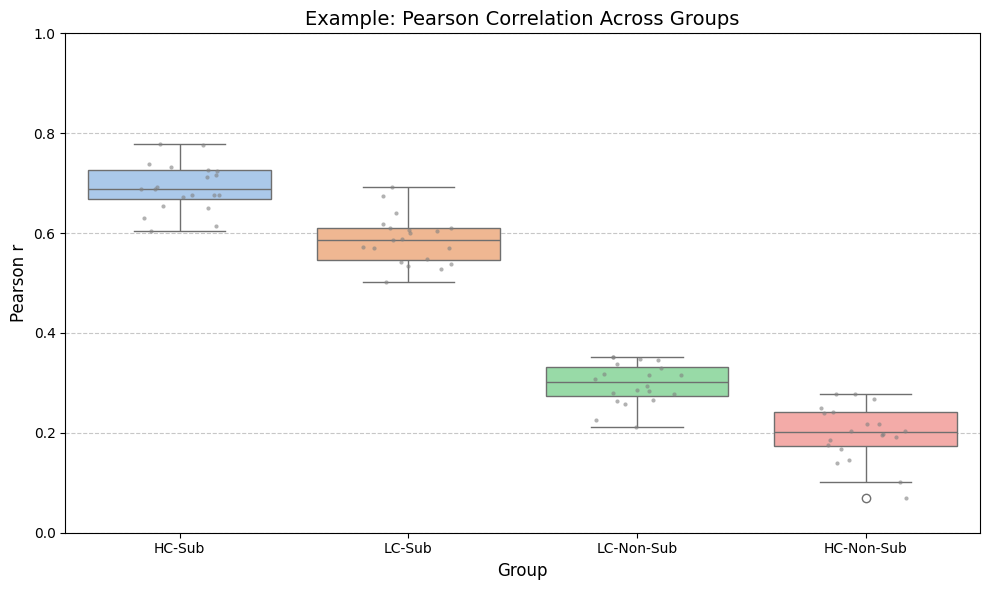

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate random Pearson correlations for each group
data = {
    'group': (['HC-Sub'] * 20 +
              ['LC-Sub'] * 20 +
              ['LC-Non-Sub'] * 20 +
              ['HC-Non-Sub'] * 20),
    'pearson_r': (np.random.normal(loc=0.7, scale=0.05, size=20).tolist() +   # High correlation
                  np.random.normal(loc=0.6, scale=0.05, size=20).tolist() +   # Moderate-high
                  np.random.normal(loc=0.3, scale=0.05, size=20).tolist() +   # Lower correlation
                  np.random.normal(loc=0.2, scale=0.05, size=20).tolist())    # Lowest
}

df_mock = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='pearson_r', data=df_mock, palette='pastel')
sns.stripplot(x='group', y='pearson_r', data=df_mock, color='gray', jitter=0.2, size=3, alpha=0.6)

plt.title("Example: Pearson Correlation Across Groups", fontsize=14)
plt.ylabel("Pearson r", fontsize=12)
plt.xlabel("Group", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# ML training model and Mutationen

In [82]:
import aaanalysis as aa
df_feat = aa.load_features(name="DOM_GSEC")
aa.display_df(df_feat, show_shape=True)

DataFrame shape: (150, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.244000,0.103666,0.103666,0.106692,0.110506,0.000000,0.000000,"31,32,33,34,35",0.970400,1.438918
2,"TMD_C_JMD_C-Seg...3,4)-FINA910104",Conformation,α-helix (C-cap),α-helix termination,"Helix terminati...n et al., 1991)",0.243000,0.085064,0.085064,0.098774,0.096946,0.000000,0.000000,"31,32,33,34,35",0.000000,0.000000
3,"TMD_C_JMD_C-Seg...6,9)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.233000,0.137044,0.137044,0.161683,0.176964,0.000000,0.000001,"32,33",1.554800,2.109848
4,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
5,"TMD_C_JMD_C-Seg...6,9)-RADA880106",ASA/Volume,Volume,Accessible surface area (ASA),"Accessible surf...olfenden, 1988)",0.223000,0.095071,0.095071,0.114758,0.132829,0.000000,0.000002,"32,33",0.000000,0.000000
6,"TMD_C_JMD_C-Seg...2,3)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.222000,0.058671,0.058671,0.064895,0.069547,0.000000,0.000001,"27,28,29,30,31,32,33",0.000000,0.000000
7,"TMD_C_JMD_C-Seg...4,5)-FAUJ880109",Energy,Isoelectric point,Number hydrogen bond donors,"Number of hydro...e et al., 1988)",0.215000,0.146661,0.146661,0.174609,0.188034,0.000000,0.000004,"33,34,35,36",1.032400,1.510722
8,"TMD_C_JMD_C-Seg...3,4)-JANJ780101",ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessi...n et al., 1978)",0.215000,0.124317,0.124317,0.166309,0.153364,0.000000,0.000004,"31,32,33,34,35",1.080400,1.296094
9,"TMD_C_JMD_C-Seg...,10)-WILM950103",Polarity,Hydrophobicity (interface),Hydrophobicity (interface),"Hydrophobicity ...e et al., 1995)",0.212000,0.141305,-0.141305,0.168603,0.217235,0.000000,0.000005,"33,34",1.747200,2.150664
10,"TMD_C_JMD_C-Seg...6,9)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.125350,0.125350,0.160819,0.174121,0.000000,0.000005,"32,33",1.788800,2.700803
